In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [44]:
filename='Challenger_Ranked_Games_10minute.csv'
df=pd.read_csv(filename)

df.info(verbose=True)

#Cleaning the data
numeric_cols=df.select_dtypes(include=['number']).columns
print(numeric_cols)

nonnumeric_cols=df.select_dtypes(exclude=['number']).columns
print(nonnumeric_cols)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

gameId                          17.333743
blueWins                        -2.000132
blueTotalGolds                   7.727974
blueCurrentGolds                 3.392037
blueTotalLevel                   6.308762
blueAvgLevel                     6.308762
blueTotalMinionKills             2.393801
blueTotalJungleMinionKills       2.203714
blueFirstBlood                   0.000000
blueKill                         8.031420
blueDeath                        8.604733
blueAssist                      11.865644
blueWardPlaced                1224.488252
blueWardKills                   10.336125
blueFirstTower                   9.140814
blueFirstInhibitor             157.054576
blueTowerKills                  51.986428
blueMidTowerKills               51.958187
blueTopTowerKills               52.341064
blueBotTowerKills               89.167452
blueInhibitor                  156.066510
blueFirstDragon                 -1.278280
blueDragon                      -1.045279
blueRiftHeralds                  0

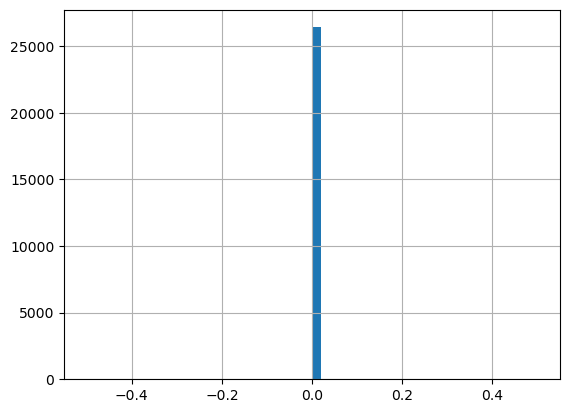

In [48]:
#Checking for any missing data
df[numeric_cols].info()
df[nonnumeric_cols].info()

num_missing=df.isna().sum()
num_missing

missing_by_row=df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)



<AxesSubplot:>

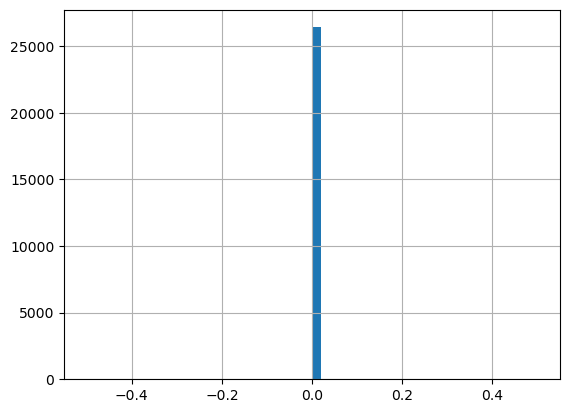

In [46]:
#Checking for any missing data
num_missing=df.isna().sum()
num_missing

missing_by_row=df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

In [49]:
df.kurt(numeric_only=True)

gameId                          17.333743
blueWins                        -2.000132
blueTotalGolds                   7.727974
blueCurrentGolds                 3.392037
blueTotalLevel                   6.308762
blueAvgLevel                     6.308762
blueTotalMinionKills             2.393801
blueTotalJungleMinionKills       2.203714
blueFirstBlood                   0.000000
blueKill                         8.031420
blueDeath                        8.604733
blueAssist                      11.865644
blueWardPlaced                1224.488252
blueWardKills                   10.336125
blueFirstTower                   9.140814
blueFirstInhibitor             157.054576
blueTowerKills                  51.986428
blueMidTowerKills               51.958187
blueTopTowerKills               52.341064
blueBotTowerKills               89.167452
blueInhibitor                  156.066510
blueFirstDragon                 -1.278280
blueDragon                      -1.045279
blueRiftHeralds                  0

<bound method boxplot_frame of            gameId  blueWins  blueTotalGolds  blueCurrentGolds  blueTotalLevel  \
0      4247263043         0           14870              2889              32   
1      4247155821         1           14497              2617              33   
2      4243963257         0           15617              1757              34   
3      4241678498         0           15684              1439              35   
4      4241538868         1           17472              3512              35   
...           ...       ...             ...               ...             ...   
26404  4143231833         0           16762              5072              36   
26405  4157911901         0           35765              1440              39   
26406  3764171638         0           15712              4137              34   
26407  4110201724         1           15850              3220              33   
26408  4100240254         1           16103              3128              34 

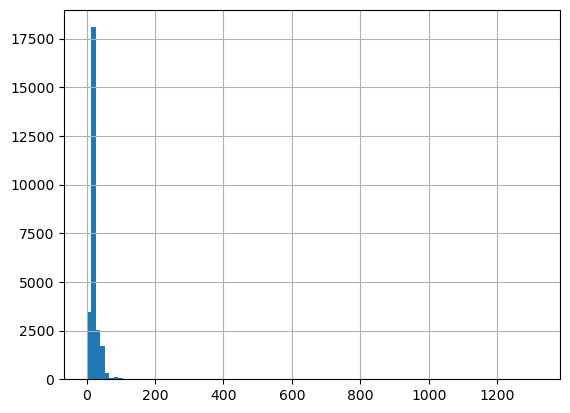

In [52]:
df['blueWardPlaced'].hist(bins=100)
df[blueWardPlaced'].boxplot